<a href="https://colab.research.google.com/github/ImAli0/DeepLearning_projects/blob/main/LSTM%20based%20SPAM%20Detector/LSTM_SPAM_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [24]:
!wget -nc https://www.kaggle.com/uciml/sms-spam-collection-dataset.csv

--2024-08-11 11:58:49--  https://www.kaggle.com/uciml/sms-spam-collection-dataset.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-08-11 11:58:49 ERROR 404: Not Found.



In [25]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [27]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
# DROPPING UNNECESSARY COLUMNS
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
# RENAMING
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
# CREATING BINARY LABELS
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

# SPLITTING UP THE DATA
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

# CONVERTING SENTENCES TO SEQUENCES
MAX_VOCAB_SIZE = 30000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

# GETTING WORD TO INTEGER MAPPING
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7271 unique tokens.


In [31]:
# PADDING SEQUENCES TO GET AN N x T MATRIX
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

print(len(df_train))
T = data_train.shape[1]

Shape of data train tensor: (3733, 162)
3733


In [32]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 162)


In [33]:
# CREATING THE MODEL

# DEFINING EMBEDDING DIMENSIONALITY
D = 20

# HIDDEN STATE DIMENSIONALITY
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [34]:
# COMPILING AND FITTING
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.8648 - loss: 0.4912 - val_accuracy: 0.8782 - val_loss: 0.2365
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9165 - loss: 0.1967 - val_accuracy: 0.9821 - val_loss: 0.0920
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9855 - loss: 0.0789 - val_accuracy: 0.9848 - val_loss: 0.0642
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.9927 - loss: 0.0498 - val_accuracy: 0.9891 - val_loss: 0.0515
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9955 - loss: 0.0329 - val_accuracy: 0.9864 - val_loss: 0.0539
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9963 - loss: 0.0249 - val_accuracy: 0.9875 - val_loss: 0.0463
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9986 - loss: 0.0138 - val_accuracy: 0.9891 - val_loss: 0.0399
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9983 - los

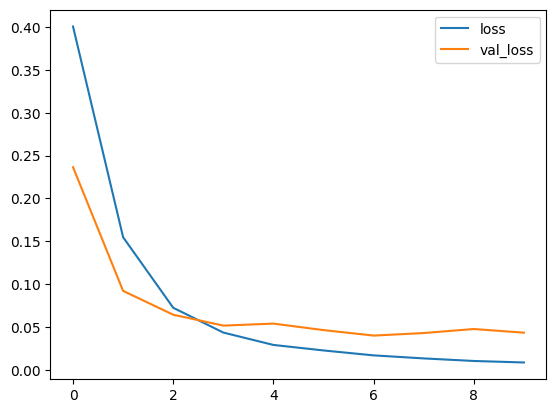

In [35]:
# PLOTTING LOSS PER ITERATION
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

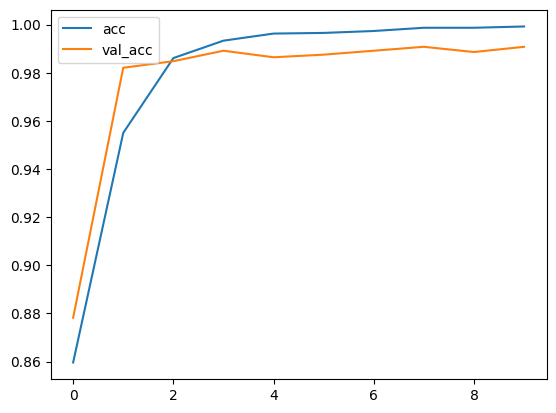

In [36]:
# PLOTTING ACCURACY PER ITERATION
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [37]:
# PREDICTING EXAMPLES
sentences = ["Free entry in 2 a wkly comp to win FA Cup final tkts",
             "I'm going to be late to the meeting.",
             "What's up?"]

# CONVERTING TO SEQUENCES
sequences = tokenizer.texts_to_sequences(sentences)

# PADDING SEQUENCES
padded_sequences = pad_sequences(sequences, maxlen=T)

# Step 3: MAKING PREDICTIONS
predictions = model.predict(padded_sequences)

threshold = 0.5
predicted_labels = ['spam' if pred > threshold else 'ham' for pred in predictions]

for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}")
    print(f"Predicted Label: {predicted_labels[i]} - Probability: {predictions[i][0]:.3f}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Sentence: Free entry in 2 a wkly comp to win FA Cup final tkts
Predicted Label: spam - Probability: 0.978

Sentence: I'm going to be late to the meeting.
Predicted Label: ham - Probability: 0.002

Sentence: What's up?
Predicted Label: ham - Probability: 0.003

